Accuracy: 0.9992978514253616
Precision: 0.8571428571428571
Recall: 0.8
F1-Score: 0.8275862068965518
Matthews Correlation Coefficient: 0.8277291008943168


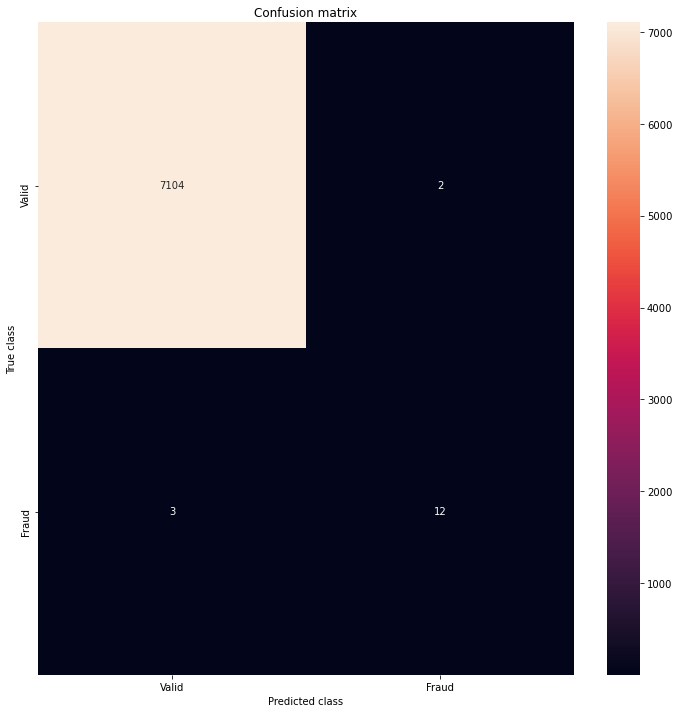

'\nAs seen in the confusion matrix, there are 7108 true positives, 2 false positives, 9 true negatives,\nand 2 false negatives. \n'

In [3]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from Resampling import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

"""
Supervised machine learning algorithms do not need to be separated from the class label,
but instead will use the class label algorithm to train the dataset first. The data has already been split
into training and testing sets in the resampling.py file

The first supervised algorithm I will run is random forest.

"""
#Building a model


# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
acc= accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1= f1_score(y_test,y_pred)
MCC=matthews_corrcoef(y_test,y_pred)

print("Accuracy: " + str(acc))
print("Precision: " + str(prec))
print("Recall: " + str(rec))
print("F1-Score: " + str(f1))
print("Matthews Correlation Coefficient: " + str(MCC))

"""
As seen, the precision and recall are both around .81, which is much higher than the isolation forest 
model which was unsupervised.

We can also create a confusion matrix to visualiaze the results, which is essentially a 4-part diagram which displays
true positives, false positives, true negatives, and false negatives in its 4 columns. 
"""
LABELS = ['Valid', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)

# Using the matplotlib pyplot library, the confusion matrix can be visually represented with a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

"""
As seen in the confusion matrix, there are 7108 true positives, 2 false positives, 9 true negatives,
and 2 false negatives. 
"""


In [ ]:
"""
The next supervised algorithm I will try to use is the multivariate Gaussian distribution algorithm. This is by far 
the most complicated out of all of the algorithms used so far. To pre process the data for this algorithm, the "Time" 
and "Amount" classes will also be dropped since this algorithm is very sensitive to distance metrics (if the ranges of 
the different features are misaligned, the accuracy of the algorithm will decrease). The dataframe 'data' used here
has already dropped the time and amount features.

The first step of the algorithm is to calculate the mean value of each feature. Since each feature is 
approximately normal, around 60% of the transactions will be within one standard deviation of the mean.

The next step is to calculate the covariance matrix on the training set. Next, calculate the multivariate
normal pdf on the training set. 

Calculate the same PDF on the validation set (~50% of fraudulent transactions and ~20% normal ones) and also
the test set. Determine a threshold which separates outliers (fraudulent) from non-outliers (valid)

Calculate outliers in the test set which are the sum of the PDF values that are smaller than the determined threshold


"""


df = pd.read_csv('creditcardfraud/creditcard.csv')

# Pre-processing the data includes droppiing the 'Time' attribute because its distribution is not approximately Gaussian
classes = df['Class']
df.drop(['Time', 'Class'], axis=1, inplace=True)
cols = df.columns.difference(['Class'])
# The Min Max Scaler function scales every feature to a scale from 0 to 1 to help the accuracy of the model.
MMscaller = MinMaxScaler()
df = MMscaller.fit_transform(df)
df = pd.DataFrame(data=df, columns=cols)
df = pd.concat([df, classes], axis=1)

# Split the original data into training, testing, and validation sets
(Xtrain, Xtest, Xval, Ytest, Yval) = train_validation_splits(df)

# Mu is an array with the mean of each feature in the training set and sigma is the covariance matrix of the training set
(mu, sigma) = estimate_gaussian_params(Xtrain)

# calculate gaussian pdf of each of the three sets
p = multivariate_normal.pdf(Xtrain, mu, sigma)
pval = multivariate_normal.pdf(Xval, mu, sigma)
ptest = multivariate_normal.pdf(Xtest, mu, sigma)

# Calculate a threshold value and F1 based on the validation set and the PDF of the validation set
(epsilon, F1) = selectThreshold(Yval, pval)

print("Best epsilon found:", epsilon)
print("Best F1 on cross validation set:", F1)
print("Outliers found:", np.sum(p < epsilon))

# Calculate an F1, recall, and precision value based on the testing set
(test_precision, test_recall, test_F1) = metrics(Ytest, ptest < epsilon)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 score:", test_F1)
